Problem Statement:

Medical Cost Personal Insurance Datasets
Problem Statement: Insurance Forecast by using Regression Algorithms

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region medical insurance is calculated .

Predict : Charges: Can you accurately predict insurance costs?

In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("medical_cost_insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.shape

(1338, 7)

In [120]:
# There are 1338 rows and 7 columns- Data set is not huge.

In [4]:
df.head()    


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [103]:
# Info about columns:

# 1) 'age': age of primary beneficiary
# 2) 'sex': insurance contractor gender: female, male
#3) 'bmi': Body mass index, providing an understanding of body, weights that are relatively high or low relative to #height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
#4) 'children': Number of children covered by health insurance / Number of dependents
#5) 'smoker': beneficiary is a smoker or non smoker
#6) 'region': the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

#7) charges: Individual medical costs billed by health insurance

#**** Charges is our Target variable


In [8]:
# Checking df information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# checking df data types

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [104]:
#Observations: 

#sex,smoker and region are object data type and we will be changing it later.

#Eventhough "children" is categorical in nature, data type is "int64" as the values in the column are integers, hence #it is fine and no need to change the data type.

# Null Values Check

In [10]:
# Checking the sum of null values for all columns

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [105]:
#Observation: Null Values are zero in all the columns

In [11]:
# checking the total sum of null values for entire dataset

df.isnull().sum().sum()

0

In [106]:
#Observations: Null values are zero in the entire dataset

In [13]:
# Deleting any duplicate values
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Statistical Summary

In [14]:
# statistical summary for discrete/continuous data

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [107]:
#Observations:

#1) All columns have same count, hence no null value in the dataset

#2) Difference between 75% and Max for "BMI' so there might be some outliers present

In [15]:
# statistical summary for Object data

df.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [108]:
#Observations:

#1) Count is the same, hence no null value present
#2) Unique value present are : Sex has 2 , Smoker has 2 and region has 4
#3) Mode of columns: sex --> male, smoker -->no, region --> southeast
#4) Frequency of mode value of columns: sex --> 676, smoker -->1064, region --> 364

# Visualization of data

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

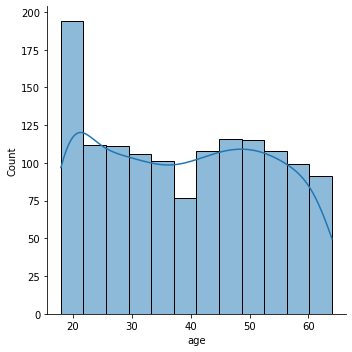

In [17]:
# Checking the distribution of continuous data

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df["age"],kde=True)
plt.show()

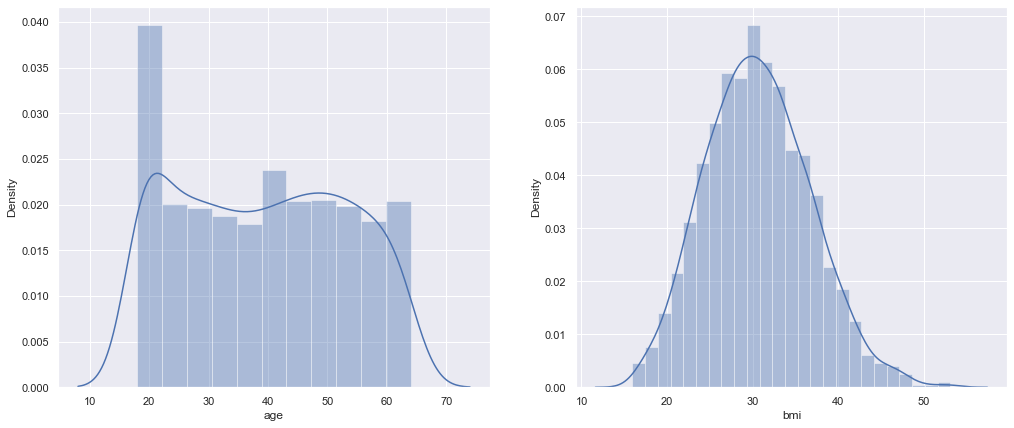

In [102]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.distplot(df[col])
plt.show()

In [109]:
#Observation:looks like both are normally distrubuted

male      676
female    662
Name: sex, dtype: int64


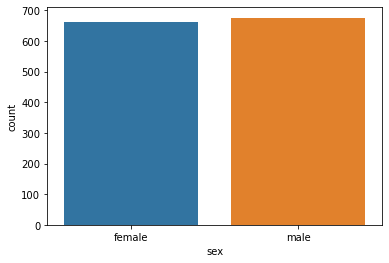

In [19]:
# Checking the count of categorical data

print(df["sex"].value_counts())
sns.countplot(df["sex"])
plt.show()

In [110]:
#Observations: 
#Total no. of males are 676 and the totla no. of females are 662. Data is a balanced data.

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


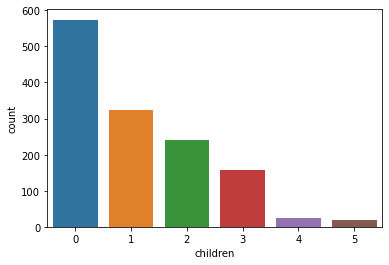

In [20]:
print(df["children"].value_counts())
sns.countplot(df["children"])
plt.show()

no     1064
yes     274
Name: smoker, dtype: int64


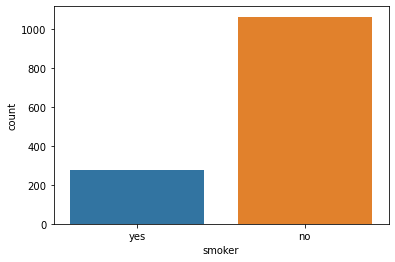

In [21]:
print(df["smoker"].value_counts())
sns.countplot(df["smoker"])
plt.show()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


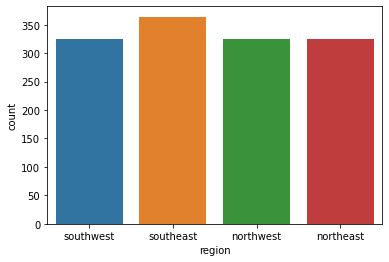

In [22]:
print(df["region"].value_counts())
sns.countplot(df["region"])
plt.show()

In [111]:
#Observations: 
#Total no. of "southeast" are 364
#Total no. of "southwest" are 325
#Total no. of "northwest" are 325 
#Total no. of "northeast" are 324



# Encoding of Categorical Data

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
# Encoding needed for columns "sex", "smoker", "region" to change string data to numerical format

In [25]:
from sklearn.preprocessing import LabelEncoder  # Using LabelEncoder
# Encoding for Sex column
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df.head(5)                        

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [26]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [27]:
# Encoding for smoker column
le=LabelEncoder()
df["smoker"]=le.fit_transform(df["smoker"])
df.head(5) 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [28]:
le.inverse_transform([0,1])

array(['no', 'yes'], dtype=object)

In [29]:
# Encoding for Region Column
le=LabelEncoder()
df["region"]=le.fit_transform(df["region"])
df.head(5) 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [30]:
df["region"].unique()

array([3, 2, 1, 0])

In [31]:
le.inverse_transform([0,1,2,3])

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [112]:
#All object data types are converted into integers. Hence now we can move ahead.

# Checking coefficients of correlation (r)

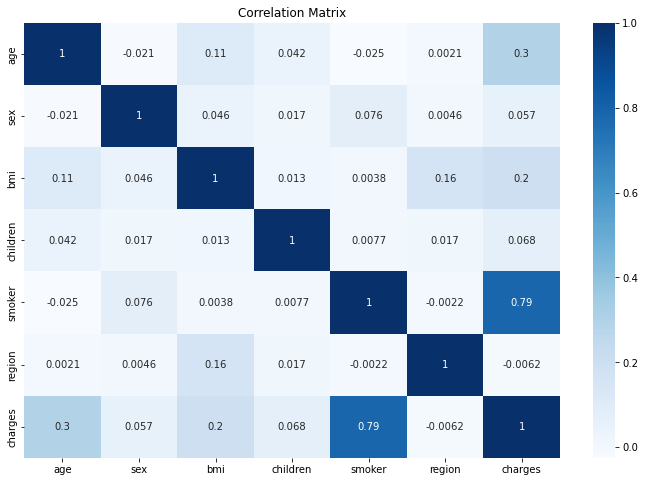

In [41]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_r,cmap="Blues",annot=True)
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.jpg")
plt.show()

In [42]:
# Arranging the relationship of target variable with other variables in descending order

corr_r["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

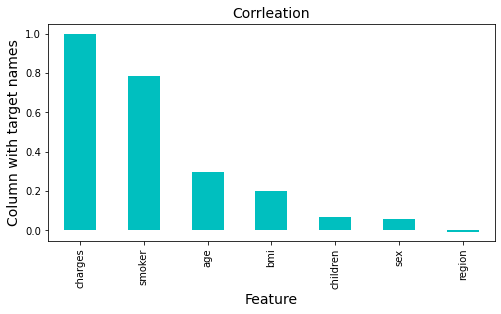

In [43]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(8,4))
corr_r["charges"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target names",fontsize=14)
plt.title("Corrleation",fontsize=14)
plt.show()


In [113]:
#Observations: (Correlation of Target variable with features)

#1) Max correlation: smoker
#2) Min correlation: region

#Eventhough "region" has weak correlation, this column is not dropped from the dataset as the dataset is small and dropping this column will loose the information

# Pre-Processing

In [44]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [45]:
# Segregating only X data
x=df.drop("charges",axis=1)

In [46]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [47]:
# Segregating only Y data
y=df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Checking Outliers

In [121]:
# We don't remove outliers of categorical X columns and in target variable
# Checking outliers on columns "age", "bmi"

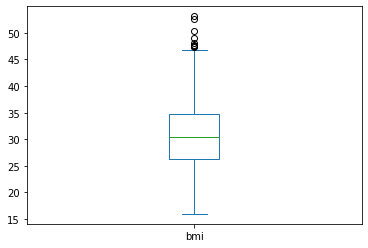

In [50]:
df["bmi"].plot.box()
plt.show()

In [122]:
# Observation: There are outliers present in BMI

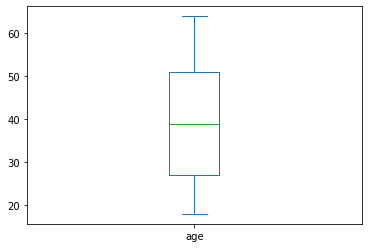

In [51]:
df["age"].plot.box()
plt.show()

In [114]:
#Observation: No outliers present in age

# Removing Outliers

In [52]:
# Calculating z score & identifying the rows and columns where absolute z score > 3
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317]),
 array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2]))

In [53]:
x.shape

(1338, 6)

In [54]:
y.shape

(1338,)

In [55]:
# Removing the rows in both x and y where the outliers are present in x features
x_new=x[(z<3).all(axis=1)]
y_new=y[(z<3).all(axis=1)]
x=x_new
y=y_new

In [56]:
# Checking the absolute zscore < 3 for the x data after removing outliers
(np.abs(zscore(x))<3).all().all()

True

In [57]:
x.shape

(1316, 6)

In [58]:
y.shape

(1316,)

In [59]:
# Data loss calculation
loss_percent=(1338-1316)/1338*100
loss_percent

1.6442451420029895

In [115]:
#Observations: Data loss is less than 10% hence it is acceptable

# Scaling X data

In [63]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.4414442 , -1.00609762, -0.45376763, -0.92823448,  1.95914147,
         1.35208943],
       [-1.5125093 ,  0.99393934,  0.52723912, -0.03853559, -0.51042766,
         0.44656796],
       [-0.80185835,  0.99393934,  0.3985551 ,  1.74086219, -0.51042766,
         0.44656796],
       ...,
       [-1.5125093 , -1.00609762,  1.04197521, -0.92823448, -0.51042766,
         0.44656796],
       [-1.29931401, -1.00609762, -0.80472404, -0.92823448, -0.51042766,
         1.35208943],
       [ 1.54328977, -1.00609762, -0.25823476, -0.92823448,  1.95914147,
        -0.45895351]])

In [64]:
x.shape

(1316, 6)

In [65]:
y.shape

(1316,)

# Model Building

In [70]:
# Starting with "LinearRegression" as the target variable is continuous data

In [71]:
# Defining the required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

lr=LinearRegression() # Defining instance for linearregression

# Finding the random state value where training r2-score = testing r2-score

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At randome state",i, " the model performs well")
        print("At randome state:",i)
        print("Training accuracy is",r2_score(y_train,pred_train)*100)
        print("Testing accuracy is",r2_score(y_test,pred_test)*100)
        print("Difference between Training and Testing accuracy is",(r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100))
        print("\n")

At randome state 431  the model performs well
At randome state: 431
Training accuracy is 75.00716546945829
Testing accuracy is 75.01144940079281
Difference between Training and Testing accuracy is 0.004283931334526869




In [116]:
#Observation: The above code states it is performing well at random state 431. Hence will be picking up that ramdom state.

In [72]:
# Using the random state: 431 and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=431)

In [73]:
# Training the model and checking r2_score with the fixed random state: 431
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.7501144940079282


# Cross Validation for Linear Regression

In [74]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Finding the optimized folds from Linear Regression where the cross validation score is same as model r2 score
for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print(" At CV:",j)
    print("Cross validation score is:",lsc*100)
    print("Model_accuracy_score is:",lss*100)
    print("Difference b/w Cross validation score and Model accuracy score is",lsc-lss)
    print("\n") 

 At CV: 2
Cross validation score is: 74.87666274306177
Model_accuracy_score is: 75.01144940079281
Difference b/w Cross validation score and Model accuracy score is -0.0013478665773104526


 At CV: 3
Cross validation score is: 74.49726511284571
Model_accuracy_score is: 75.01144940079281
Difference b/w Cross validation score and Model accuracy score is -0.005141842879471059


 At CV: 4
Cross validation score is: 74.61079357315701
Model_accuracy_score is: 75.01144940079281
Difference b/w Cross validation score and Model accuracy score is -0.0040065582763580965


 At CV: 5
Cross validation score is: 74.71508430420552
Model_accuracy_score is: 75.01144940079281
Difference b/w Cross validation score and Model accuracy score is -0.0029636509658730326


 At CV: 6
Cross validation score is: 74.58807356080324
Model_accuracy_score is: 75.01144940079281
Difference b/w Cross validation score and Model accuracy score is -0.004233758399895815


 At CV: 7
Cross validation score is: 74.62083263709324
Mo

In [117]:
#Observations: At CV=2, Difference b/w Cross validation score and Model r2 score is less hence selected CV=2

In [75]:
# Using fixed CV=2 and checking the cross validation score again to compare with model score 
lsscore_selected=cross_val_score(lr,x,y,cv=2).mean()
print("The CV score is:",lsscore_selected*100,"\nThe model score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 74.87666274306177 
The model score is: 75.01144940079281
Difference is: 0.0013478665773104526


# Other Classification Algorithms

In [76]:
# Checking accuracy with Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc))

0.5853162070697672


In [78]:
score=cross_val_score(dtc,x,y,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,preddtc)*100)
print("Difference is:",r2_score(y_test,preddtc)-score)

The CV score is: 68.03317337179273 
The model score is: 58.53162070697672
Difference is: -0.09501552664816015


In [79]:
# Checking accuracy with KNearestNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
knnc=KNeighborsRegressor()
knnc.fit(x_train,y_train)
predknnc=knnc.predict(x_test)
print(r2_score(y_test,predknnc))

0.7986501923115574


In [81]:
score=cross_val_score(knnc,x,y,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predknnc)*100)
print("Difference is:",r2_score(y_test,predknnc)-score)

The CV score is: 80.52770675235404 
The model score is: 79.86501923115574
Difference is: -0.006626875211982908


In [82]:
# Checking accuracy with Gradient Descent Regressor
from sklearn.linear_model import SGDRegressor
sgdc=SGDRegressor()
sgdc.fit(x_train,y_train)
predsgdc=sgdc.predict(x_test)
print(r2_score(y_test,predsgdc))

0.7503840058211279


In [83]:
score=cross_val_score(sgdc,x,y,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predsgdc)*100)
print("Difference is:",r2_score(y_test,predsgdc)-score)

The CV score is: 74.88665496742952 
The model score is: 75.03840058211279
Difference is: 0.0015174561468326297


In [84]:
# Checking accuracy with SVC Regressor
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)
predsvc=sv.predict(x_test)
print(r2_score(y_test,predsvc))

-0.0447593813692484


In [85]:
score=cross_val_score(sv,x,y,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predsvc)*100)
print("Difference is:",r2_score(y_test,predsvc)-score)

The CV score is: -9.913638736019825 
The model score is: -4.47593813692484
Difference is: 0.054377005990949856


# Regularization

In [86]:
# Checking accuracy with Lasso Regressor
from sklearn.linear_model import Lasso
lsr=Lasso()
lsr.fit(x_train,y_train)
predlsr=lsr.predict(x_test)
print(r2_score(y_test,predlsr))


0.7501076384708704


In [87]:
score=cross_val_score(lsr,x,y,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predlsr)*100)
print("Difference is:",r2_score(y_test,predlsr)-score)

The CV score is: 74.87675368290057 
The model score is: 75.01076384708703
Difference is: 0.0013401016418647105


In [88]:
# Checking accuracy with Ridge Regressor
from sklearn.linear_model import Ridge
rdr=Ridge()
rdr.fit(x_train,y_train)
predrdr=rdr.predict(x_test)
print(r2_score(y_test,predrdr))

score=cross_val_score(rdr,x,y,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predrdr)*100)
print("Difference is:",r2_score(y_test,predrdr)-score)

0.7500786955387843
The CV score is: 74.87749762669638 
The model score is: 75.00786955387842
Difference is: 0.0013037192718204915


# Ensembling Techniques

In [93]:
# Checking accuracy with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print(r2_score(y_test,predRFR))

score=cross_val_score(RFR,x,y,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predRFR)*100)
print("Difference is:",r2_score(y_test,predRFR)-score)

0.8120951052571828
The CV score is: 83.37123484662217 
The model score is: 81.20951052571827
Difference is: -0.021617243209038906


In [90]:
# Checking accuracy with Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
ET=ExtraTreesRegressor()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(r2_score(y_test,predET))

score=cross_val_score(ET,x,y,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predET)*100)
print("Difference is:",r2_score(y_test,predET)-score)

0.8126828939103135
The CV score is: 81.21854772458373 
The model score is: 81.26828939103135
Difference is: 0.0004974166644761135


In [91]:
# Checking accuracy with Ada Boosting Regressor
from sklearn.ensemble import AdaBoostRegressor
ABC=AdaBoostRegressor()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(r2_score(y_test,predABC))

score=cross_val_score(ABC,x,y,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predABC)*100)
print("Difference is:",r2_score(y_test,predABC)-score)

0.81315686282943
The CV score is: 82.03410382142741 
The model score is: 81.315686282943
Difference is: -0.00718417538484406


In [118]:
#Observations: Out of all algorithms checked, RandomForestRegressor is selected for hyper parameter tuning as the difference between model and cross-validation score is less.

# Hyper Parameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Defining parameters for RandomForestRegressor
parameters={'criterion':['mse','mae'],
           'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)  # printing the best parameters

{'criterion': 'mse', 'max_features': 'log2'}


In [98]:
# Training the model using best parameters from GridSearchCV and checking the r2_score
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(rf,x,y,cv=2)
rfc=rfscore.mean()
print("Cross Val Score:",rfc*100)
print("Difference is:",r2_score(y_test,pred_decision)-rfc)

R2 Score: 83.09260577790157
Cross Val Score: 83.33000961537878
Difference is: -0.002374038374772125


# Save Model

In [99]:
 # saving the hyperparameter tuned radom forest model
    
import pickle
filename='medical_insurance_cost_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [100]:
loaded_model=pickle.load(open('medical_insurance_cost_prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

83.09260577790157


,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
Predicted,12103.781075,11847.169334,14734.733339,6421.953076,11427.105236,8007.669588,4456.980099,8780.861644,13346.787708,11674.533418,...,8774.928799,15679.019284,12360.871623,8814.987843,11546.397592,15678.412877,13987.396253,39637.938787,14950.447231,5008.984991
Original,27117.993780,11763.000900,13217.094500,4906.409650,9634.538000,4320.410850,2689.495400,8059.679100,10370.912550,8444.474000,...,8017.061150,20462.997660,11163.568000,6435.623700,8765.249000,12557.605300,13844.797200,42760.502200,14692.669350,4151.028700


In [119]:
#Additional Notes:

#1) As the dataset is small with 6 no. of x columns, multi collinearity is not checked and did not apply VIF to remove multi collinearity as this will lead to data loss.

#2) Did not use PCA as the dataset is small.